In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
# pd.options.plotting.backend = "plotly"

In [2]:
def psi(A,B,SOC):
    return A* ((1-SOC)**B)

psi(0.000274,2.1,0.5)

6.39127599202713e-05

In [8]:
A = 0.000274
B = 2.1

n_breakpoints = 5
n_segments = n_breakpoints - 1

points_list = []
alpha_beta_pairs = []

for i in range(n_breakpoints):
    # (SOC, psi)
    points_list.append((i/n_segments, psi(A, B, i/n_segments)))

for j in range(n_segments):
    alpha = (points_list[j+1][1] - points_list[j][1]) / (points_list[j+1][0] - points_list[j][0])
    beta = points_list[j][1] - alpha * points_list[j][0]
    alpha_beta_pairs.append((alpha, beta))
print(alpha_beta_pairs)

[(-0.0004969829179274153, 0.000274), (-0.0003433660423914995, 0.00023559578111602105), (-0.00019601832609530072, 0.00016192192296792166), (-5.963271358578449e-05, 5.963271358578449e-05)]


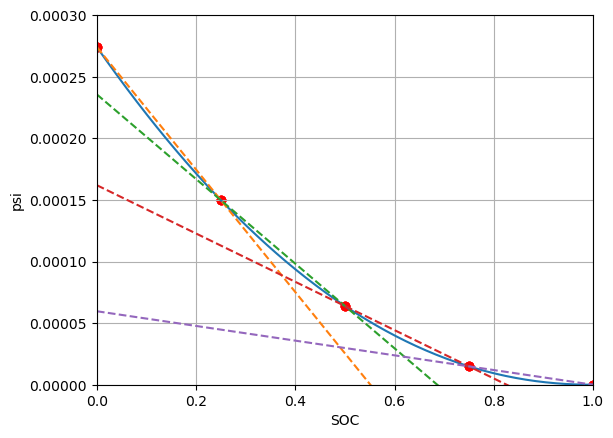

In [18]:
import numpy as np

# Generate 200 sample points for SOC
SOC_values = np.linspace(0, 1, 200)
psi_values = [psi(A, B, soc) for soc in SOC_values]

# Extract the SOC and psi values from points_list
SOC_points, psi_points = zip(*points_list)

# Plot the function psi
plt.plot(SOC_values, psi_values, label='psi function')

# Plot the 5 points linear approximation
# plt.scatter(SOC_points, psi_points, color='red', label='Linear Approximation Points')

# Add labels and legend
# Plot the linear segments
for alpha, beta in alpha_beta_pairs:
    plt.plot(SOC_values, alpha * SOC_values + beta, linestyle='--', label=f'Line: alpha={alpha:.2e}, beta={beta:.2e}')


    plt.scatter(SOC_points, psi_points, color='red', label='Linear Approximation Points')
plt.xlabel('SOC')
plt.ylabel('psi')
plt.ylim(0, 0.0003)
plt.xlim(0, 1)
# plt.legend()
plt.grid()
plt.show()

In [9]:
import plotly.graph_objects as go
import numpy as np

A = 0.000274
B = 2.1

# Generate 200 sample points for SOC
SOC_values = np.linspace(0, 1, 200)
psi_values = [psi(A, B, soc) for soc in SOC_values]
# Create traces
fig = go.Figure()

# Add the psi function trace
fig.add_trace(go.Scatter(x=SOC_values, y=psi_values, mode='lines', name='psi function'))

# Add the linear approximation points
# fig.add_trace(go.Scatter(x=SOC_points, y=psi_points, mode='markers', name='Linear Approximation Points', marker=dict(color='red')))

# Add the linear segments
for alpha, beta in alpha_beta_pairs:
    fig.add_trace(go.Scatter(x=SOC_values, y=alpha * SOC_values + beta, mode='lines', name=f'Line: alpha={alpha:.2e}, beta={beta:.2e}', line=dict(dash='dash')))

# Update layout
fig.update_layout(
    xaxis_title='SOC',
    yaxis_title='psi',
    yaxis=dict(range=[0, 0.0003]),
    xaxis=dict(range=[0, 1]),
    showlegend=True,
    grid=dict(show=True)
)

fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Grid: 'show'

Did you mean "rows"?

    Valid properties:
        columns
            The number of columns in the grid. If you provide a 2D
            `subplots` array, the length of its longest row is used
            as the default. If you give an `xaxes` array, its
            length is used as the default. But it's also possible
            to have a different length, if you want to leave a row
            at the end for non-cartesian subplots.
        domain
            :class:`plotly.graph_objects.layout.grid.Domain`
            instance or dict with compatible properties
        pattern
            If no `subplots`, `xaxes`, or `yaxes` are given but we
            do have `rows` and `columns`, we can generate defaults
            using consecutive axis IDs, in two ways: "coupled"
            gives one x axis per column and one y axis per row.
            "independent" uses a new xy pair for each cell, left-
            to-right across each row then iterating rows according
            to `roworder`.
        roworder
            Is the first row the top or the bottom? Note that
            columns are always enumerated from left to right.
        rows
            The number of rows in the grid. If you provide a 2D
            `subplots` array or a `yaxes` array, its length is used
            as the default. But it's also possible to have a
            different length, if you want to leave a row at the end
            for non-cartesian subplots.
        subplots
            Used for freeform grids, where some axes may be shared
            across subplots but others are not. Each entry should
            be a cartesian subplot id, like "xy" or "x3y2", or ""
            to leave that cell empty. You may reuse x axes within
            the same column, and y axes within the same row. Non-
            cartesian subplots and traces that support `domain` can
            place themselves in this grid separately using the
            `gridcell` attribute.
        xaxes
            Used with `yaxes` when the x and y axes are shared
            across columns and rows. Each entry should be an x axis
            id like "x", "x2", etc., or "" to not put an x axis in
            that column. Entries other than "" must be unique.
            Ignored if `subplots` is present. If missing but
            `yaxes` is present, will generate consecutive IDs.
        xgap
            Horizontal space between grid cells, expressed as a
            fraction of the total width available to one cell.
            Defaults to 0.1 for coupled-axes grids and 0.2 for
            independent grids.
        xside
            Sets where the x axis labels and titles go. "bottom"
            means the very bottom of the grid. "bottom plot" is the
            lowest plot that each x axis is used in. "top" and "top
            plot" are similar.
        yaxes
            Used with `yaxes` when the x and y axes are shared
            across columns and rows. Each entry should be an y axis
            id like "y", "y2", etc., or "" to not put a y axis in
            that row. Entries other than "" must be unique. Ignored
            if `subplots` is present. If missing but `xaxes` is
            present, will generate consecutive IDs.
        ygap
            Vertical space between grid cells, expressed as a
            fraction of the total height available to one cell.
            Defaults to 0.1 for coupled-axes grids and 0.3 for
            independent grids.
        yside
            Sets where the y axis labels and titles go. "left"
            means the very left edge of the grid. *left plot* is
            the leftmost plot that each y axis is used in. "right"
            and *right plot* are similar.
        
Did you mean "rows"?

Bad property path:
show
^^^^

In [19]:
alpha_beta_pairs

[(-0.0004969829179274153, 0.000274),
 (-0.0003433660423914995, 0.00023559578111602105),
 (-0.00019601832609530072, 0.00016192192296792166),
 (-5.963271358578449e-05, 5.963271358578449e-05)]

In [21]:
psi(0.000274,2.1,0.5)

6.39127599202713e-05

In [ ]:
df_comp = pd.DataFrame(zip(instance.SOC_storage.extract_values().values(), instance.psi.extract_values().values()), columns=['SOC','psi'])
df_comp['psi_exact'] = df_comp['SOC'].apply(lambda x: psi(0.000274,2.1,x))